In [1]:
from datetime import datetime
import requests

response = requests.get('http://atlas.obs-hp.fr/sophie/sophie.cgi?n=sophies&a=htab&ob=ra,seq&c=o&o=51%20peg')

print(response.status_code)

200


In [2]:
import bs4

# Obtener el html

soup = bs4.BeautifulSoup(response.text, 'html.parser')

xpath_title = '//table[@class="datatable"]/tbody/tr/td[7]/text()'

query = soup.select('table[class="datatable"] tbody tr')

print(len(query))
#print(query[1].select('td')[6])
dates = []
for i in range(0, len(query)):
    #print(query[i].select('td')[6].text)
    dates.append(query[i].select('td')[6].text)
print('dates: ', len(dates))

183
dates:  183


In [3]:
import bs4

# Obtener el html

soup = bs4.BeautifulSoup(response.text, 'html.parser')

xpath_title = '//table[@class="datatable"]/thead/tr/th/a/text()'


query = soup.select('table[class="datatable"] thead th')


# Head

In [4]:
#query = soup.select('table[class="datatable"] thead tr th a')
#header = [querys.text for querys in query]


def _get_headers():
    row_header = soup.select('table[class="datatable"] thead tr th a')
    # table_body's header
    headers = [header.text for header in row_header]

    # List of data I want to get
    data_list = ['date', 'fiber_b', 'sn26', 'view_head', 'search_ccf']  
    position = []
    for i in range(0, len(headers)):
        for data in data_list:
            if headers[i] == data:
                position.append(i)

    columns = {}
    for i in range(0, len(data_list)):
        columns[data_list[i]] = position[i]
    return headers, columns
_get_headers()

(['objname',
  'RA (J2000) Dec',
  'S',
  'E',
  'seq',
  'slen',
  'date',
  'mode',
  'fiber_b',
  'exptime',
  'sn26',
  'view_spec',
  'view_head',
  'get_spec',
  'get_e2ds',
  'customize',
  'search_ccf'],
 {'date': 6, 'fiber_b': 8, 'sn26': 10, 'view_head': 12, 'search_ccf': 16})

In [5]:

query = soup.select('table[class="datatable"] thead th')
print(len(query))

header = []
for i in range(0,len(query)):
    header.append(query[i].text)

lista = ['date', 'fiber_b', 'sn26', 'view_spec', 'search_ccf']    
posicion = []
for i in range(0,len(header)):
    for j in range(0,len(lista)):
        if header[i] == lista[j]:
            posicion.append(i)

diccionario ={}
for i in range(0, len(lista)):
    diccionario[lista[i]]=posicion[i]
diccionario

17


{'date': 6, 'fiber_b': 8, 'sn26': 10, 'view_spec': 11, 'search_ccf': 16}

# Body

In [6]:
query = soup.select('table[class="datatable"] tbody tr')


print(query[3].select('td')[16].select('a')[0])
#print(query[0])

<a href="sophie.cgi?n=sophiecc&amp;a=hexp&amp;fql=[seq =825680]">search_CCF</a>


In [7]:
#Codigo de ejemplo platzi
def article_links(self):
    link_list = []
    for link in self._select(self._queries['homepage_article_links']):
        if link and link.has_attr('href'):
            link_list.append(link)

    return set(link['href'] for link in link_list)

In [8]:
def column():    
    query = soup.select('table[class="datatable"] tbody tr')
    
    select_a = []
    for i in range(0, len(query)):
        data = query[i].select('td')[12].select('a')
        
        select_a.append(data)
    
    link_list = []
    none_url = []
    for index, link in enumerate(select_a):
        if len(link) == 0:
            none_url.append(index)
        elif link[0] and link[0].has_attr('href'):
            link_list.append(link)

            
    return list(link[0]['href'] for link in link_list), none_url


In [9]:
a, none_url_list = column()
print(a)
print(none_url_list)

['sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,671480]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,815760]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,815780]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,825680]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,847890]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,848960]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1014070]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1203340]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1217920]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1225370]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1244250]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,133040]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,133820]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,137810]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,139920]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,145770]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,146670]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,147590]', 'sop

# Borrar datos faltantes

In [10]:
def _obtein_data(rows, column_name, none_url_list):

    results = []
    for i in range(0, len(rows)):
        data = rows[i].select('td')[column_name].text
        if len(data) !=0:
            results.append(data)
        elif len(data) == 0:
            results.append('')
    
    results_clean = np.delete(results, none_url_list).tolist()
    return results_clean

In [11]:
import numpy as np
lista_nombres = ['Ricky', 'Alvaro', 'David', 'Jacinto', 'Jose', 'Ricky', 'Jose', 'Jose']
borrar = [0,1,2]
np.delete(lista_nombres, borrar).tolist()
# Returns: ['l', '42', 'u']

['Jacinto', 'Jose', 'Ricky', 'Jose', 'Jose']

# Corregir link

In [12]:
links, none_url_list = column()
print(links)
print(none_url_list)

['sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,671480]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,815760]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,815780]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,825680]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,847890]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,848960]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1014070]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1203340]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1217920]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1225370]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1244250]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,133040]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,133820]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,137810]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,139920]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,145770]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,146670]', 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,147590]', 'sop

In [13]:
unir_espacios = [link.replace(' ', '') for link in links]
unir_espacios

['sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,671480]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,815760]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,815780]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,825680]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,847890]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,848960]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1014070]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1203340]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1217920]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1225370]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,1244250]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,133040]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,133820]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,137810]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,139920]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,145770]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,146670]',
 'sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2

### http://atlas.obs-hp.fr/sophie/sophie.cgi?n=sophiecc&a=hexp&fql=[seq%20=671480]
### http://atlas.obs-hp.fr/sophie/sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,671480]

In [15]:
def _build_link(links):
    unir_espacios = [link.replace(' ', '') for link in links]
    link_header = 'http://atlas.obs-hp.fr/sophie/'
    
    new_link = []
    for i in unir_espacios:
        new_link.append('{}{}'.format(link_header, i))
    return new_link

In [16]:
print(_build_link(links)[0])

http://atlas.obs-hp.fr/sophie/sophie.cgi?n=sophie&c=i&z=fd&o=sophie:[e2ds,671480]


In [17]:
# cadena.endswith('da') TRUE

# JD. Unir a transform.py la 3ra celda

In [85]:
response = requests.get(_build_link(links)[0])

soup = bs4.BeautifulSoup(response.text, 'html.parser')

In [99]:
query = soup.select('div[class="cizfd"] pre')
x = query[0].text
x = ''
print(x.index('BJD     24'))

ValueError: substring not found

In [95]:

inicio = query[0].text.index('BJD     24')
final = query[0].text.index('Barycentric Julian Day')
JD = float(query[0].text[inicio:final].replace('BJD','').replace(' ', ''))
JD, inicio, final

(2454700.48409259, 38210, 38235)

In [21]:
mensaje9 = "Hola Mundo"
inicio = mensaje9.find('Ho')
final = mensaje9.find('do')
mensaje9[inicio:final]

'Hola Mun'

# Radial Velocity. Unir a transform.py la 3ra celda

In [77]:
response = requests.get('http://atlas.obs-hp.fr/sophie/sophie.cgi?n=sophiecc&a=hexp&fql=[seq%20=671480]')

soup = bs4.BeautifulSoup(response.text, 'html.parser')

In [78]:
print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html>
<head>
<title>Cross-correlation functions</title> <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="pleinpot.css" rel="stylesheet" type="text/css"/>
<base target="_top"/>
<script src="pleinpot.js"></script>
<script>var pleinpot_version='8.18.10'; var table_description='Cross-correlation functions';var table_name='sophiecc'</script>
</head>
<body>
<table border="0"><tr><td><a href="http://www.obs-hp.fr/"><img alt="Observatoire de Haute Provence (OHP)" border="0" src="logo-OHP.gif"/></a></td><td align="center" width="100%"><font face="helvetica,arial"><h1>The SOPHIE archive</h1></font></td> <td><a href="http://www.obs-hp.fr/guide/sophie/sophie-eng.shtml"><img alt="SOPHIE" border="0" src="sophie_sm.jpg" width="200"/></a></td></tr></table>
<br/><center><h2>
<script>document.write(table_description);</script>
</h2></center><br/>
<div class="cozd">
<di

In [79]:
query = soup.select('table[class="datatable"] tr')
RV = query[7].select('td')[1].text
print(RV)

-33.139 ± 0.0002


In [81]:
class NewsPage:

    def __init__(self, response):
        self.response = response
        
    def radial_velocity(self):
        response = self.response
        soup = bs4.BeautifulSoup(response.text, 'html.parser')
        query = soup.select('table[class="datatable"] tr')
        result = query[7].select('td')[1].text
        return result

In [82]:
response = requests.get('http://atlas.obs-hp.fr/sophie/sophie.cgi?n=sophiecc&a=hexp&fql=[seq%20=671480]')
result = NewsPage(response)
print(result.radial_velocity())

-33.139 ± 0.0002


# DataFrame

In [114]:
import pandas as pd
import numpy as np
a= [1,2,4,2,5]
b= [5,3,2,6,7]
c= np.array([a,b])
header = ['asf', 'abc']
df = pd.DataFrame(c.T, columns = header)
print(df)
c.T

,0,1
0,1,5
1,2,3
2,4,2
3,2,6
4,5,7


In [41]:
# python 3.x
import pandas as pd
import numpy as np
df = pd.DataFrame(
    data=np.random.randint(
        0, 10, (6,4)))
df.columns=["a", "b", "c", "d"]
print(df)

   a  b  c  d
0  8  4  4  4
1  4  4  4  6
2  4  4  6  3
3  9  2  9  5
4  3  8  6  6
5  2  5  5  3


# Analisis del DataFrame

- RV y err_RV esta en Km/s
- Formato de fecha: Año - mes - día

In [1]:
!ls

51_peg_2021_04_25.csv
__pycache__
example.ipynb
extract
transform
venv


In [175]:
import pandas as pd

df = pd.read_csv('51_peg_2021_04_25.csv', sep=';')
df = df.drop('Unnamed: 0', axis=1)
df

,dates,fibers,signal_to_noise,radial_velocity,julian_day
0,2008-08-21,WAVE,490,-33.139 ± 0.0002,2.454700e+06
1,2009-07-24,WAVE,83,-33.227 ± 0.0014,2.455038e+06
2,2009-07-24,WAVE,144,-33.222 ± 0.0008,NaN
3,2009-08-06,WAVE,392,-33.229 ± 0.0003,2.455050e+06
4,2009-09-07,WAVE,157,-33.138 ± 0.0007,2.455083e+06
...,...,...,...,...,...
171,2010-08-13,WAVE,138,-33.259 ± 0.0021,NaN
172,2010-08-13,WAVE,58,-33.244 ± 0.0008,2.455423e+06
173,2010-08-13,WAVE,139,-33.256 ± 0.0007,2.455423e+06
174,2010-08-13,WAVE,151,-33.258 ± 0.0010,2.455423e+06


In [176]:
df.nunique()

dates               44
fibers               2
signal_to_noise    116
radial_velocity    158
julian_day         157
dtype: int64

In [177]:
df.columns

Index(['dates', 'fibers', 'signal_to_noise', 'radial_velocity', 'julian_day'], dtype='object')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dates            176 non-null    object 
 1   fibers           176 non-null    object 
 2   signal_to_noise  176 non-null    int64  
 3   radial_velocity  175 non-null    object 
 4   julian_day       157 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.0+ KB


In [173]:
# Arreglar los tipos de datos
df['dates'] = df['dates'].astype('datetime64')
df['fibers'] = df['fibers'].astype('str')
df['radial_velocity'] = df['radial_velocity'].astype('str')
df['julian_day'] = df['julian_day'].astype('float64')

In [174]:
# ordenar por fecha
df = df.sort_values(by='dates', ascending=True)
df

,dates,fibers,signal_to_noise,radial_velocity,julian_day,JD
11,2006-08-28,DARK,138,-33.209,2.453977e+06,2.453977e+06
12,2006-08-29,DARK,105,-33.147,2.453978e+06,2.453978e+06
13,2006-09-09,DARK,122,-33.229,2.453989e+06,2.453989e+06
14,2006-09-12,DARK,260,-33.175,2.453991e+06,2.453991e+06
15,2006-09-17,WAVE,220,-33.201,2.453996e+06,2.453996e+06
...,...,...,...,...,...,...
6,2010-08-24,WAVE,461,-33.137 ± 0.0002,2.455434e+06,2.455434e+06
7,2011-07-19,WAVE,271,-33.136 ± 0.0004,2.455763e+06,2.455763e+06
8,2011-08-08,WAVE,210,-33.217 ± 0.0005,2.455783e+06,2.455783e+06
9,2011-08-20,WAVE,173,-33.207 ± 0.0006,2.455794e+06,2.455794e+06


In [145]:
# Filtrar datos WAVE
df = df[df['fibers'] =='WAVE']

In [146]:
# Filtrar sns > 90
df = df[df['signal_to_noise'] > 70]
df

,dates,fibers,signal_to_noise,radial_velocity,julian_day
15,2006-09-17,WAVE,220,-33.201,2.453996e+06
19,2006-10-08,WAVE,282,-33.219,2.454017e+06
21,2006-10-13,WAVE,229,-33.248,2.454022e+06
22,2006-10-14,WAVE,361,-33.192,2.454023e+06
23,2006-10-15,WAVE,361,-33.146,2.454024e+06
...,...,...,...,...,...
6,2010-08-24,WAVE,461,-33.137 ± 0.0002,2.455434e+06
7,2011-07-19,WAVE,271,-33.136 ± 0.0004,2.455763e+06
8,2011-08-08,WAVE,210,-33.217 ± 0.0005,2.455783e+06
9,2011-08-20,WAVE,173,-33.207 ± 0.0006,2.455794e+06


In [147]:
df_JD_null = df[ df['julian_day'].isnull()]
df_JD_null

,dates,fibers,signal_to_noise,radial_velocity,julian_day
59,2007-08-12,WAVE,92,-33.159,NaN
63,2007-08-12,WAVE,164,-33.200,NaN
2,2009-07-24,WAVE,144,-33.222 ± 0.0008,NaN
86,2010-08-02,WAVE,99,-33.145 ± 0.0010,NaN
93,2010-08-03,WAVE,96,-33.131 ± 0.0009,NaN
104,2010-08-05,WAVE,81,-33.226 ± 0.0013,NaN
101,2010-08-05,WAVE,93,-33.228 ± 0.0013,NaN
127,2010-08-08,WAVE,170,-33.203 ± 0.0007,NaN
146,2010-08-10,WAVE,134,-33.179 ± 0.0009,NaN
147,2010-08-10,WAVE,123,-33.184 ± 0.0013,NaN


In [164]:
df = df.dropna().reset_index(drop=True)
df

,dates,fibers,signal_to_noise,radial_velocity,julian_day
0,2006-08-28,DARK,138,-33.209,2.453977e+06
1,2006-08-29,DARK,105,-33.147,2.453978e+06
2,2006-09-09,DARK,122,-33.229,2.453989e+06
3,2006-09-12,DARK,260,-33.175,2.453991e+06
4,2006-09-17,WAVE,220,-33.201,2.453996e+06
...,...,...,...,...,...
152,2010-08-24,WAVE,461,-33.137 ± 0.0002,2.455434e+06
153,2011-07-19,WAVE,271,-33.136 ± 0.0004,2.455763e+06
154,2011-08-08,WAVE,210,-33.217 ± 0.0005,2.455783e+06
155,2011-08-20,WAVE,173,-33.207 ± 0.0006,2.455794e+06


In [170]:
# Separar RV y err_rv
separar = (df.apply(lambda row: row['radial_velocity'] + '±', axis=1)
               .apply(lambda extract: extract.split('±'))
               .apply(lambda numbers: list(map(lambda number: number.replace(' ', ''), numbers)))
          )
RV = [separar[i][0] for i in range(0, len(df))]
#err_RV = [separar[i][1] for i in range(0, len(df))]
# Hacerla una funcion en transform.py
err_RV = []
for i in range(0,len(df)):
    if len(separar[i][1]) != 0:
        err_RV.append(separar[i][1])
    elif len(separar[i][1]) == 0:
        err_RV.append(None)
#print(RV, err_RV)

In [171]:
# Unir al dataFrame
df = df.drop('radial_velocity', axis=1)
df['RV'] = RV
df['err_RV'] = err_RV
df

,dates,fibers,signal_to_noise,julian_day,RV,err_RV
0,2006-08-28,DARK,138,2.453977e+06,-33.209,None
1,2006-08-29,DARK,105,2.453978e+06,-33.147,None
2,2006-09-09,DARK,122,2.453989e+06,-33.229,None
3,2006-09-12,DARK,260,2.453991e+06,-33.175,None
4,2006-09-17,WAVE,220,2.453996e+06,-33.201,None
...,...,...,...,...,...,...
152,2010-08-24,WAVE,461,2.455434e+06,-33.137,0.0002
153,2011-07-19,WAVE,271,2.455763e+06,-33.136,0.0004
154,2011-08-08,WAVE,210,2.455783e+06,-33.217,0.0005
155,2011-08-20,WAVE,173,2.455794e+06,-33.207,0.0006


In [151]:
# Arreglar tipo de datos de RV y err_RV
df['RV'] = df['RV'].astype('float64')
df['err_RV'] = df['err_RV'].astype('float64')
df = df.dropna().reset_index(drop=True)
df

,dates,fibers,signal_to_noise,julian_day,RV,err_RV
0,2008-08-21,WAVE,490,2.454700e+06,-33.139,0.0002
1,2009-07-24,WAVE,83,2.455038e+06,-33.227,0.0014
2,2009-08-06,WAVE,392,2.455050e+06,-33.229,0.0003
3,2009-09-07,WAVE,157,2.455083e+06,-33.138,0.0007
4,2009-09-10,WAVE,370,2.455086e+06,-33.163,0.0003
...,...,...,...,...,...,...
71,2010-08-24,WAVE,461,2.455434e+06,-33.137,0.0002
72,2011-07-19,WAVE,271,2.455763e+06,-33.136,0.0004
73,2011-08-08,WAVE,210,2.455783e+06,-33.217,0.0005
74,2011-08-20,WAVE,173,2.455794e+06,-33.207,0.0006


In [153]:
# Filtrar datos err_RV
df = df[df['err_RV'] < 0.0009]

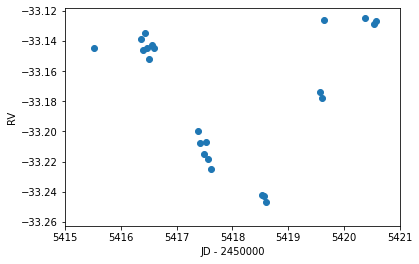

In [155]:
import matplotlib.pyplot as plt

y = df['RV']
x = df['julian_day'] - 2450000
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('JD - 2450000')
ax.set_ylabel('RV')
#ax.barh(df['dates'], align='edge', height=0.5, width=0.5)
plt.xlim(5415, 5421)
plt.show()

In [156]:
# Filtrar datos WAVE
df = df[df['err_RV'] < 0.0009]
df = df[df['julian_day'] - 2450000 > 5415]
df = df[df['julian_day'] - 2450000 < 5421]

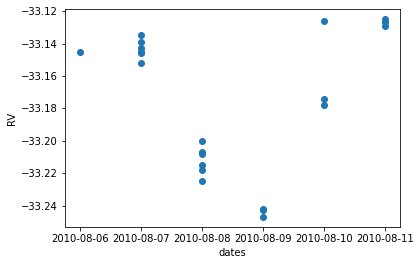

In [157]:
import matplotlib.pyplot as plt

y = df['RV']
x = df['julian_day'] - 2450000
fig, ax = plt.subplots()
ax.scatter(df['dates'], y)
ax.set_xlabel('dates')
ax.set_ylabel('RV')
#ax.barh(df['dates'], align='edge', height=0.5, width=0.5)
#plt.xlim(5415, 5421)
plt.show()

In [22]:
import numpy as np
unique, counts = np.unique(df['dates'], return_counts=True)
unique, counts

(array(['2008-08-21T00:00:00.000000000', '2009-08-06T00:00:00.000000000',
        '2009-09-07T00:00:00.000000000', '2009-09-10T00:00:00.000000000',
        '2010-08-02T00:00:00.000000000', '2010-08-03T00:00:00.000000000',
        '2010-08-06T00:00:00.000000000', '2010-08-07T00:00:00.000000000',
        '2010-08-08T00:00:00.000000000', '2010-08-09T00:00:00.000000000',
        '2010-08-10T00:00:00.000000000', '2010-08-11T00:00:00.000000000',
        '2010-08-13T00:00:00.000000000', '2010-08-24T00:00:00.000000000',
        '2011-07-19T00:00:00.000000000', '2011-08-08T00:00:00.000000000',
        '2011-08-20T00:00:00.000000000', '2011-09-14T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([1, 1, 1, 1, 1, 4, 4, 9, 9, 7, 4, 5, 4, 1, 1, 1, 1, 1], dtype=int64))

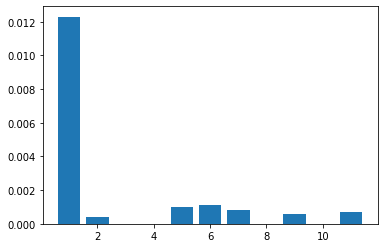

In [327]:
fig, ax = plt.subplots()
ax.bar(counts, unique)
plt.show()

In [ ]:
missing_titles = (df[missing_titles_mask]['url']
                        .str.extract(r'(?P<missing_titles>[^/]+)$')
                        .applymap(lambda title: title.split('-'))
                        .applymap(lambda title_word_list: ' '.join(title_word_list))
                      )
    
df.loc[missing_titles_mask, 'title'] = missing_titles.loc[:,'missing_titles']

In [ ]:
stripped_body = (df
                     .apply(lambda row: row[column_name], axis=1)
                     .apply(lambda column: list(column))
                     .apply(lambda letters: list(map(lambda letter: letter.replace('\n', '').replace('\r', ''), letters)))
                     .apply(lambda letters: ''.join(letters))
                    )
    
df[column_name] = stripped_body